In [2]:
# Building a Convent
import tensorflow as tf

from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt



In [3]:
# Loading and Splitting the Datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalization of pixels into 0's and 1's
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']


Text(0.5, 0, 'horse')

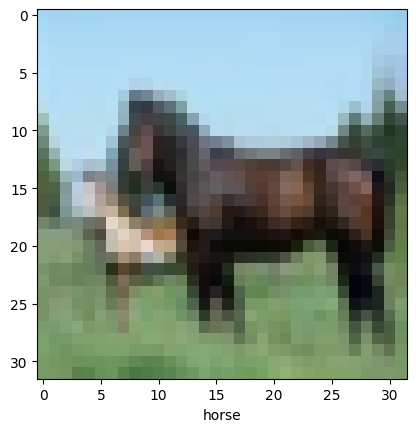

In [4]:
# Viewing an Image
IMG_INDEX = 12
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])

In [5]:
# CNN Architecture -- building a convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

2023-03-21 04:42:23.376669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Peeking into our Model
model.summary()
test_images.shape

# P.S : We are not done yet, lol

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

(10000, 32, 32, 3)

In [7]:
# Adding Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Let's peak again
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Training the Model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 64s 40ms/step - loss: 1.3987 - accuracy: 0.4960 - val_loss: 1.1555 - val_accuracy: 0.5863
Epoch 2/4
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1129 - accuracy: 0.6048 - val_loss: 1.0714 - val_accuracy: 0.6198
Epoch 3/4
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9784 - accuracy: 0.6572 - val_loss: 0.9624 - val_accuracy: 0.6629
Epoch 4/4
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8814 - accuracy: 0.6920 - val_loss: 0.9035 - val_accuracy: 0.6816


In [10]:
# Evaluating the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9035 - accuracy: 0.6816 - 3s/epoch - 9ms/step
0.6815999746322632


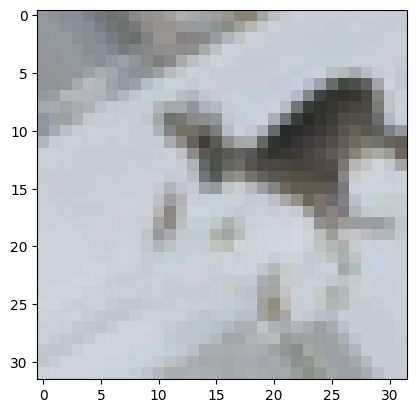

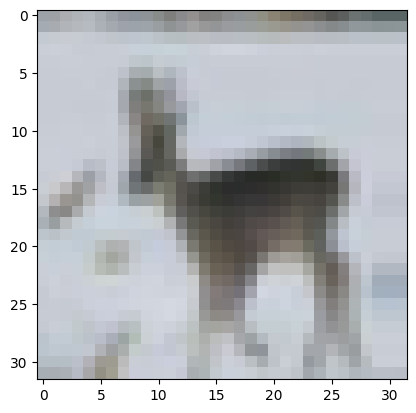

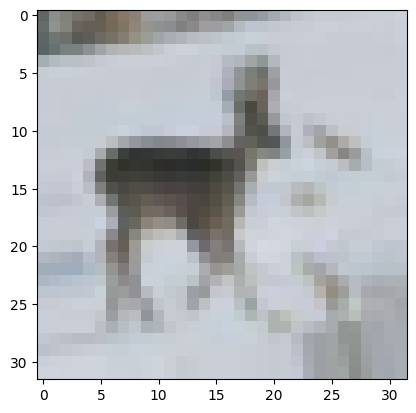

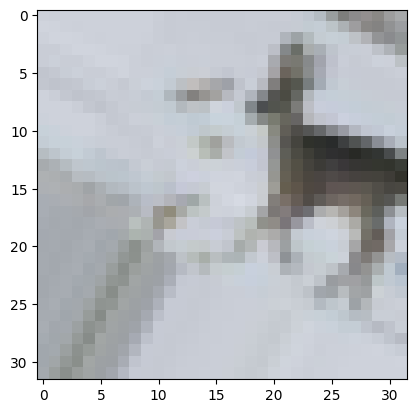

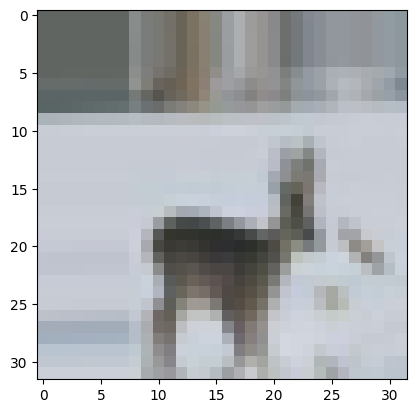

In [12]:
# Data Augmentation
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import scipy

# Creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Picking an Image to transform
test_img = train_images[20]
img = img_to_array(test_img) # Converted the image to numpy
img = img.reshape((1,) + img.shape) # Reshape the Image

i = 0

# A continuous loop till it breaks, thereby saving the image to the directory
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(img_to_array(batch[0]))
    i += 1
    if i > 4: # show 4 images
        break
    
plt.show()


In [ ]:
# Using a Pre-trained Model
